# Exercise 4: recommender System

In [1]:
#check if notebook runs in colab
import sys
IN_COLAB = 'google.colab' in sys.modules
print('running in Colab:',IN_COLAB)
path='..'
if IN_COLAB:
  #in colab, we need to clone the data from the repo
  !git clone https://github.com/keuperj/DataScienceSS20.git
  path='DataScienceSS20'

running in Colab: False


## Code from the lecture

In [2]:
#read data to DataFrames
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(path+'/DATA/movielens100k/u.user', sep='|', names=u_cols, encoding = "ISO-8859-1")

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv(path+'/DATA/movielens100k/u.data', sep='\t', names=r_cols, encoding = "ISO-8859-1")

m_cols=['movie_id', 'title', 'release date', 'video release date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv(path+'/DATA/movielens100k/u.item', sep='|', names=m_cols ,encoding = "ISO-8859-1" )

In [24]:
def getTopN(movie_id,D, N=5):
    return D[movie_id,:].argsort()[-N:]

def getIDbyName(name):
    if np.size(movies.movie_id[movies.title.str.contains(name)]) > 0:
        m = int(movies.movie_id[movies.title.str.contains(name)][:1]), str(movies.title[movies.title.str.contains(name)][:1])
        return m[0]-1
    else:
        return -1
    
def getNameByID(IDs):
    res=movies.iloc[IDs]
    return res.title

def CII(title):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopN(getIDbyName(title)))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")
        
# re implement  eval functions to allow different rankings
def Score_byID(ID, D, Test, f): #f ist the ranking function
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = f(ID,D)[::-1]
    res_title = getNameByID(f(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score(D_train, R_test,f=getTopN): #f ist the ranking function -> function as argument
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i],f)
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

In [14]:
#gerate matrix (this can be done more efficiently!)
R=np.zeros((np.shape(users)[0],np.shape(movies)[0]))
for i in range(np.shape(ratings)[0]):
    R[ratings['user_id'][i]-1, ratings['movie_id'][i]-1]=ratings['rating'][i]

## 4.1 Alternative Distance Measures
Implement a different distance measure, e.g. eucledian and compare the ressults.

In [15]:
#cosine distance
import scipy.spatial
D_cos=scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(R.T, metric='cosine'))
D_cos=np.abs(np.nan_to_num( D_cos-1)) #dist to similarity 
np.fill_diagonal(D_cos,0) #set self-dist to zero

In [16]:
#euclidean distance
import scipy.spatial
D_euc=scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(R.T, metric='euclidean'))
D_euc=np.abs(np.nan_to_num( D_euc-np.max(D_euc)))  #dist to similarity 
np.fill_diagonal(D_euc,0) #set self-dist to zero

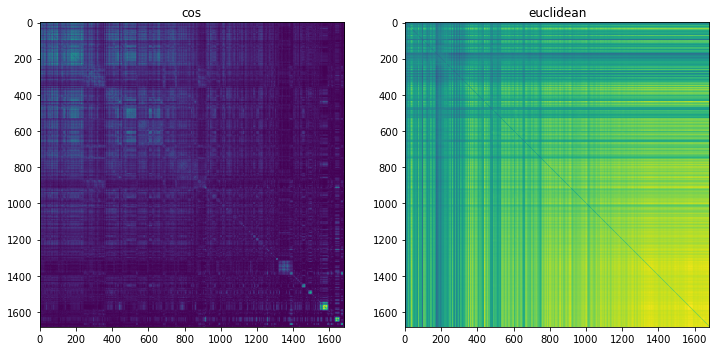

In [17]:
#compare results
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(1,2,1)
ax1.title.set_text('cos')
plt.imshow(D_cos)
ax2 = fig.add_subplot(1,2,2)
ax2.title.set_text('euclidean')
plt.imshow(D_euc)
plt.show()



In [28]:
#copied from solution for completeness
from sklearn.model_selection import train_test_split
R_train, R_test = train_test_split(R, test_size=0.1)

#re-train D on train data
D_cos=scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(R_train.T, metric='cosine'))
D_cos=np.abs(np.nan_to_num( D_cos-1)) #dist to similarity 
np.fill_diagonal(D_cos,0) #set self-dist to zero

D_euc=scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(R_train.T, metric='euclidean'))
D_euc=np.abs(np.nan_to_num( D_euc-1)) #dist to similarity 
np.fill_diagonal(D_euc,0) #set self-dist to zero

test_cos=test_Score(D_cos,R_test)
test_L2=test_Score(D_euc,R_test)

print("Mean scores on test: cos:",np.mean(test_cos), "L2:",np.mean(test_L2))
print("Median scores on test: cos:",np.median(test_cos), "L2:",np.median(test_L2))

Mean scores on test: cos: 2.1583157894736846 L2: 1.4378947368421051
Median scores on test: cos: 2.16 L2: 1.3599999999999999


## 4.2 Baseline Results
Implement and compare results of
* random recommendations
* allways recommending the top 5 movies (over all users)

In [27]:
test_top=test_Score(D_cos,R_test,getTopMoviewFromAll)

NameError: name 'getTopMoviewFromAll' is not defined

## 4.3 SVD
Implement the SVD approach. Hints: 
* use numpy.linalg.svd()
* apply SVD on $R$
* plot the singular values and decide where to cut off the reconstruction
* reconstruct R and evaluate $R'$
* compute the distance between two movies using $R'$


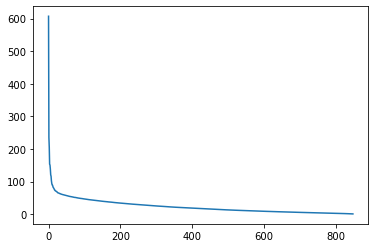

In [30]:
U,S,V = np.linalg.svd(R_train)
plt.plot(S)
plt.show()

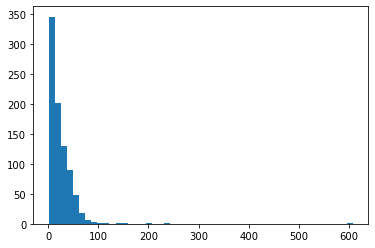

In [32]:
plt.hist(S, bins=50)
plt.show()

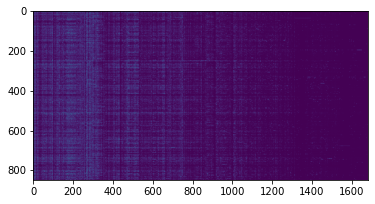

In [36]:
R_approx = np.dot(U[:,:10]*S[:10],V[:10,:])
plt.imshow(np.abs(R_train-R_approx))
plt.show()